In [0]:
# !kill -9 -1 # cleaning the memory

In [0]:
#@title Importing Libraries
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import random
from operator import attrgetter

In [3]:
#@title Mounting drive and installing libraries
from google.colab import drive
drive.mount('/content/gdrive')

!pip install -U seaborn

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [4]:
#@title Linking validation dataset
df_val = pd.read_csv('/content/gdrive/My Drive/MAAI/data/validation.csv')
df_val.to_hdf('validation.h5', 'val')
df_val.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:1471: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['bidid', 'userid', 'useragent', 'IP', 'domain', 'url', 'slotid', 'slotvisibility', 'slotformat', 'creative', 'keypage', 'usertag']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1.0,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2.0,...,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2.0,...,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2.0,...,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"


In [5]:
#@title Linking training dataset
df_train = pd.read_csv('/content/gdrive/My Drive/MAAI/data/train.csv')
df_train.to_hdf('train.h5', 'train')
df_train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:1471: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['bidid', 'userid', 'useragent', 'IP', 'domain', 'url', 'slotid', 'slotvisibility', 'slotformat', 'creative', 'keypage', 'usertag']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN


# Constant Bidding

In [6]:
# constants
initial_budget = 6250*1000
range_step = 1

# setting the range
min_bid = np.min(df_val["payprice"].values) # "payprice" or"slotprice" ?
max_bid = np.max(df_val["payprice"].values) # "payprice" or "bidprice" ?
range_bids = np.arange(min_bid, max_bid, range_step)

print(min_bid, max_bid)

0 300


In [0]:
def constant_bidding(df):
  # storing this data
  all_clicks = []
  all_impressions = []
  all_costs = []

  # running for all possible bids
  for bid in range_bids:
    temp_budget = initial_budget
    clicks = 0
    impressions = 0.0
    payprices = 0.0

    # looping through validation set
    for payprice, click in df[['payprice','click']].values:
      if bid >= payprice and temp_budget > payprice:
        temp_budget = temp_budget - payprice
        clicks = clicks + click
        impressions = impressions + 1
        payprices = payprices + payprice

    # saving results of the loop
    all_clicks.append(clicks)
    all_impressions.append(impressions)
    all_costs.append(payprices)
    
  return all_clicks, all_impressions, all_costs

In [0]:
# # storing this data
# all_clicks_const = []
# all_impressions_const = []
# all_costs_const = []

In [0]:
# # running for all possible bids
# for bid in range_bids:
#   temp_budget = initial_budget
#   clicks = 0
#   impressions = 0.0
#   payprices = 0.0

#   # looping through validation set
#   for payprice, click in df_val[['payprice','click']].values:
#     if bid >= payprice and temp_budget > payprice:
#       temp_budget = temp_budget - payprice
#       clicks = clicks + click
#       impressions = impressions + 1
#       payprices = payprices + payprice
  
#   # saving results of the loop
#   all_clicks_const.append(clicks)
#   all_impressions_const.append(impressions)
#   all_costs_const.append(payprices)

In [10]:
all_clicks_const, all_impressions_const, all_costs_const = constant_bidding(df_val)

# calculating results
df_const_bidding = pd.DataFrame()
df_const_bidding['bid #'] = range_bids   

# adding new entries
all_impressions_const = [int(x) for x in all_impressions_const]
df_const_bidding['impressions'] = all_impressions_const 

df_const_bidding['clicks'] = all_clicks_const
df_const_bidding['ctr'] = (df_const_bidding['clicks']/df_const_bidding['impressions']).astype(float)

all_costs_const = [x / 1000 for x in all_costs_const]
df_const_bidding['cost'] = all_costs_const
df_const_bidding['cpm'] = (df_const_bidding['cost']/df_const_bidding['impressions'] * 1000).astype(str)
df_const_bidding['cpc'] = (df_const_bidding['cost']/df_const_bidding['clicks']).astype(str) 

df_const_bidding.head(10)

,bid #,impressions,clicks,ctr,cost,cpm,cpc
0,0,82,0,0.000000,0.000,0.0,nan
1,1,373,0,0.000000,0.291,0.7801608579088471,inf
2,2,851,0,0.000000,1.247,1.4653349001175089,inf
3,3,943,0,0.000000,1.523,1.6150583244962884,inf
4,4,2176,0,0.000000,6.455,2.966452205882353,inf
5,5,7833,0,0.000000,34.740,4.435082343929529,inf
6,6,9624,4,0.000416,45.486,4.726309226932668,11.3715
7,7,11103,4,0.000360,55.839,5.029181302350716,13.95975
8,8,12373,4,0.000323,65.999,5.334114604380506,16.49975
9,9,13708,4,0.000292,78.014,5.691129267580974,19.5035


In [11]:
df_const_bidding.describe()

,bid #,impressions,clicks,ctr,cost
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,149.500000,95688.523333,49.656667,0.000508,5243.997560
std,86.746758,31003.007970,16.340404,0.000144,2009.197327
min,0.000000,82.000000,0.000000,0.000000,0.000000
25%,74.750000,82394.250000,51.000000,0.000405,6249.999000
50%,149.500000,93236.500000,55.500000,0.000533,6249.999000
75%,224.250000,115552.500000,58.000000,0.000632,6249.999000
max,299.000000,162213.000000,68.000000,0.000653,6249.999000


In [12]:
clicks_win = df_const_bidding[df_const_bidding['clicks'] == max(df_const_bidding['clicks'])]
clicks_win

,bid #,impressions,clicks,ctr,cost,cpm,cpc
77,77,146888,68,0.000463,6249.999,42.54941860465116,91.91175
79,79,145941,68,0.000466,6249.999,42.82551853146134,91.91175


In [13]:
# winner = []
ctr_win = df_const_bidding[df_const_bidding['ctr'] == max(df_const_bidding['ctr'])]
ctr_win

,bid #,impressions,clicks,ctr,cost,cpm,cpc
259,259,82689,54,0.000653,6249.999,75.58440663207922,115.74072222222222


In [14]:
for _,row in ctr_win.iterrows():
  print("Max CTR:", row['ctr'], "of bid #", row['bid #'])

for _,row in clicks_win.iterrows():
  print("Max clicks:", row['clicks'], "of bid #", row['bid #'])
  
#   print("Max clicks:", max(df_const_bidding['ctr']), "of bid #", int(df_const_bidding[df_const_bidding['ctr'] == max(df_const_bidding['ctr'])]['bid #']))

Max CTR: 0.0006530493777890651 of bid # 259
Max clicks: 68 of bid # 77
Max clicks: 68 of bid # 79


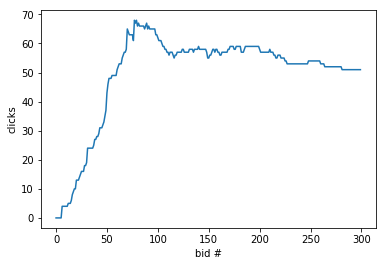

In [15]:
ax = sns.lineplot(x="bid #", y="clicks", data=df_const_bidding)
# list_data_cb = [df_const_bidding.loc[:"bid #", "ctr"], df_const_bidding.loc[:"bid #", "clicks"]]
# ax = sns.lineplot(data=list_data_cb)
# list_data

# # plt.plot( 'bid #', 'ctr', data=df_const_bidding, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'bid #', 'ctr', data=df_const_bidding, marker='', color='olive', linewidth=2)
# plt.plot( 'bid #', 'clicks', data=df_const_bidding, color='olive', linewidth=2, linestyle='dashed', label="clicks")
# plt.legend()

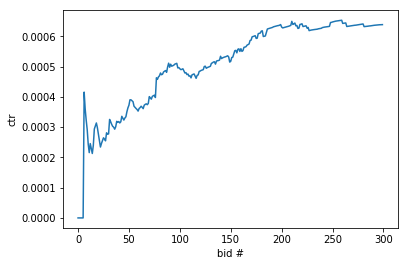

In [16]:
ax = sns.lineplot(x="bid #",y='ctr',data=df_const_bidding)

In [0]:
# def data_ctr_vs_clicks_weekdays_optimised(df):
#   list_data_cb = [df.loc[:"bid #", "ctr"], df.loc[:"bid #", "clicks"]]
#   for i in range(len(list_data_cb[0])):
#     list_data_cb[0][i] = list_data_cb[0][i] * 100 # ctr amplified by 500
#   return list_data_cb

# data = data_ctr_vs_clicks_weekdays_optimised(df_const_bidding)
# ax = sns.lineplot(data=data)
# # list_data_cb

# df_const_bidding.describe()

**Optimal constant bid: ** 77 or 79 to give 68 clicks.

## Constant Bidding per Weeekday

In [0]:
def const_bidding_per_weekday_analysis(df, bid = 79):
  # storing this data
  all_clicks = []
  all_impressions = []
  all_costs = []

  # running for all possible bids
  for weekday_global in range(7):
#     print(weekday_global)
    temp_budget = initial_budget
    clicks = 0
    impressions = 0.0
    payprices = 0.0

    # looping through validation set
    for payprice, click, weekday in df[['payprice','click', 'weekday']].values:
      if bid >= payprice and temp_budget > payprice and weekday_global == weekday:
        temp_budget = temp_budget - payprice
        clicks = clicks + click
        impressions = impressions + 1
        payprices = payprices + payprice

    # saving results of the loop
    all_clicks.append(clicks)
    all_impressions.append(impressions)
    all_costs.append(payprices)
    
  return all_clicks, all_impressions, all_costs

all_clicks_weekday_analysis, all_impressions_weekday_analysis, all_costs_weekday_analysis = const_bidding_per_weekday_analysis(df_val)
# ax = sns.lineplot(x="bid #",y='ctr',hue='weekday',data=df_const_bidding)

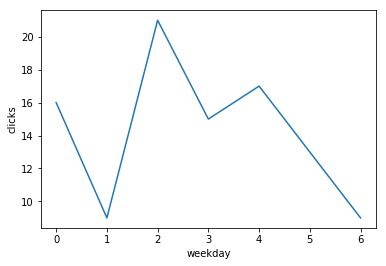

In [19]:
df_const_bidding_weekday_analysis = pd.DataFrame()
df_const_bidding_weekday_analysis['clicks'] = all_clicks_weekday_analysis
df_const_bidding_weekday_analysis['weekday'] = [0,1,2,3,4,5,6]
ax = sns.lineplot(x="weekday",y='clicks',data=df_const_bidding_weekday_analysis)

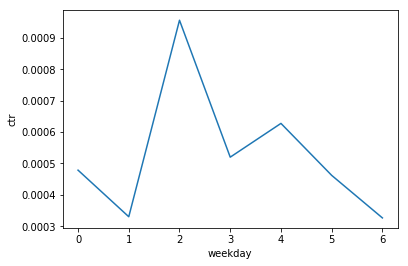

In [20]:
all_impressions_weekday_analysis = [int(x) for x in all_impressions_weekday_analysis]
df_const_bidding_weekday_analysis['impressions'] = all_impressions_weekday_analysis
df_const_bidding_weekday_analysis['ctr'] = (df_const_bidding_weekday_analysis['clicks']/df_const_bidding_weekday_analysis['impressions']).astype(float)
ax = sns.lineplot(x="weekday",y='ctr',data=df_const_bidding_weekday_analysis)

## Optimised Constant Bidding per Weeekday



In [0]:
constant_bid_per_weekday_clicks = []
constant_bid_per_weekday_ctr = []

def constant_bidding_weekdays(df, current_weekday):
  # storing this data
  all_ctr = []
  all_clicks = []
  all_bids = []
#   all_costs = []
  
  # running for all possible bids
  for bid in range_bids:
    temp_budget = initial_budget
    clicks = 0
    impressions = 0.0
    payprices = 0.0

    # looping through validation set
    for payprice, click, weekday in df[['payprice','click', 'weekday']].values:
      if bid >= payprice and temp_budget > payprice and str(current_weekday) == str(weekday):
        temp_budget = temp_budget - payprice
        clicks = clicks + click
        impressions = impressions + 1
#         payprices = payprices + payprice

    # saving results of the loop
    all_clicks.append(clicks)
    if impressions == 0:
      all_ctr.append(0)
    else:
      all_ctr.append(clicks / impressions)
#     all_costs.append(payprices)
    all_bids.append(bid)
  
  df_weekday = pd.DataFrame()
  df_weekday['bid'] = all_bids
  df_weekday['clicks'] = all_clicks
  df_weekday['ctr'] = all_ctr
  
  return df_weekday[df_weekday['ctr'] == max(df_weekday['ctr'])], df_weekday[df_weekday['clicks'] == max(df_weekday['clicks'])]

# final results per weekday
max_bids_weekdays = []
for i in range(7):
  max_ctr, max_clicks = constant_bidding_weekdays(df_val, i)
  
  max_bids_weekdays.append(max_clicks)
  max_bids_weekdays.append(max_ctr)

In [22]:
print("Max clicks per weekday:")

for i in range(0,14,2):
  print("Weekday", int(i / 2))
  print(max_bids_weekdays[i])

Max clicks per weekday:
Weekday 0
     bid  clicks       ctr
282  282      32  0.000610
283  283      32  0.000610
284  284      32  0.000610
285  285      32  0.000610
286  286      32  0.000610
287  287      32  0.000610
288  288      32  0.000610
289  289      32  0.000609
290  290      32  0.000609
291  291      32  0.000609
292  292      32  0.000609
293  293      32  0.000609
294  294      32  0.000609
295  295      32  0.000609
296  296      32  0.000608
297  297      32  0.000608
298  298      32  0.000608
299  299      32  0.000608
Weekday 1
     bid  clicks       ctr
253  253      20  0.000443
254  254      20  0.000443
255  255      20  0.000443
256  256      20  0.000442
257  257      20  0.000442
258  258      20  0.000442
259  259      20  0.000442
260  260      20  0.000441
261  261      20  0.000441
262  262      20  0.000441
263  263      20  0.000441
264  264      20  0.000441
265  265      20  0.000441
266  266      20  0.000440
267  267      20  0.000440
268  268   

In [23]:
print("Max CTR per weekday:")

for i in range(1,14,2):
  print("Weekday", int(i / 2))
  print(max_bids_weekdays[i])

Max CTR per weekday:
Weekday 0
     bid  clicks      ctr
282  282      32  0.00061
Weekday 1
     bid  clicks       ctr
253  253      20  0.000443
Weekday 2
   bid  clicks       ctr
6    6       4  0.003497
Weekday 3
     bid  clicks       ctr
270  270      29  0.000684
Weekday 4
     bid  clicks       ctr
254  254      28  0.000697
Weekday 5
     bid  clicks       ctr
160  160      26  0.000694
Weekday 6
     bid  clicks       ctr
226  226      25  0.000611


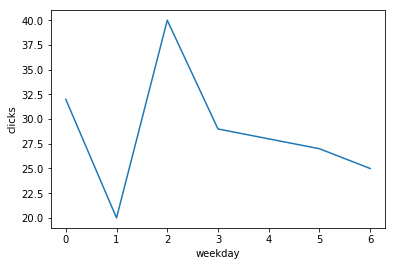

In [24]:
max_clicks_per_weekday = []
for i in range(0,14,2):
  max_clicks_per_weekday.append(max(max_bids_weekdays[i]['clicks']))
  
df_temp_weekdays = pd.DataFrame()
df_temp_weekdays['clicks'] = max_clicks_per_weekday

max_clicks_per_weekday = []
for i in range(7):
  max_clicks_per_weekday.append(i)
  
df_temp_weekdays['weekday'] = max_clicks_per_weekday
palette = sns.color_palette("mako_r", 6)
ax = sns.lineplot(x="weekday", y="clicks", data=df_temp_weekdays, palette=palette)

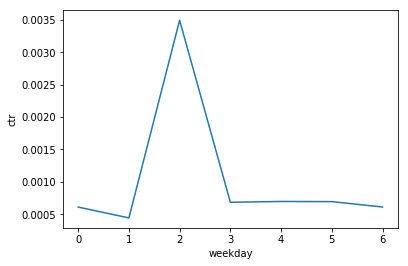

In [25]:
def graph_ctr_const_bid():
  max_ctr_per_weekday = []
  for i in range(1,14,2):
    max_ctr_per_weekday.append(max(max_bids_weekdays[i]['ctr']))

  df_temp_weekdays = pd.DataFrame()
  df_temp_weekdays['ctr'] = max_ctr_per_weekday

  max_ctr_per_weekday = []
  for i in range(7):
    max_ctr_per_weekday.append(i)

  df_temp_weekdays['weekday'] = max_ctr_per_weekday
  return df_temp_weekdays
df_temp = graph_ctr_const_bid()
ax = sns.lineplot(x="weekday", y="ctr", data=df_temp)

In [0]:
# def graph_const_bid_weekdays():
#   df_temp_weekdays = pd.DataFrame()
  
#   max_per_weekday = []
#   for i in range(1,14,2):
#     max_per_weekday.append(max(max_bids_weekdays[i]['ctr'])*200) # amplified by 200
#   df_temp_weekdays['ctr'] = max_per_weekday
  
#   max_per_weekday = []
#   for i in range(0,14,2):
#     max_per_weekday.append(max(max_bids_weekdays[i]['clicks']))
#   df_temp_weekdays['clicks'] = max_per_weekday

#   max_per_weekday = []
#   for i in range(7):
#     max_per_weekday.append(i)
#   df_temp_weekdays['weekday'] = max_per_weekday
  
#   return df_temp_weekdays

# df_temp = graph_const_bid_weekdays()
# list_data_cbw = [df_temp.loc[:"weekday", "ctr"], df_temp.loc[:"weekday", "clicks"]]
# # list_data
# # ax = sns.lineplot(x="weekday", y="ctr", data=df_temp)
# ax = sns.lineplot(data=list_data_cbw)

## Constant Bidding per Advertiser

In [0]:
# generate a list of advertisers
all_adv = []
for adv in df_val['advertiser']:
  all_adv.append(adv)
all_adv = list(set(all_adv))

def const_bidding_per_adv_analysis(df, bid = 79):
  # storing this data
  all_clicks = []
  all_impressions = []
  all_costs = []

  # running for all possible bids
  for adv_global in all_adv:
    temp_budget = initial_budget
    clicks = 0
    impressions = 0.0
    payprices = 0.0

    # looping through validation set
    for payprice, click, adv in df[['payprice','click', 'advertiser']].values:
      if bid >= payprice and temp_budget > payprice and adv_global == adv:
        temp_budget = temp_budget - payprice
        clicks = clicks + click
        impressions = impressions + 1
        payprices = payprices + payprice

    # saving results of the loop
    all_clicks.append(clicks)
    all_impressions.append(impressions)
    all_costs.append(payprices)
    
  return all_clicks, all_impressions, all_costs

all_clicks_adv_analysis, all_impressions_adv_analysis, all_costs_adv_analysis = const_bidding_per_adv_analysis(df_val)

# print(all_adv)
# print(all_clicks_adv_analysis)

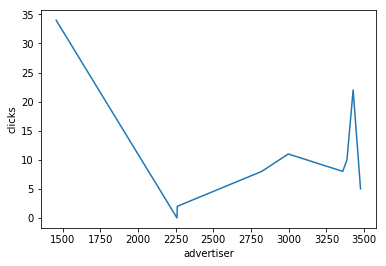

In [28]:
df_const_bidding_adv_analysis = pd.DataFrame()
df_const_bidding_adv_analysis['clicks'] = all_clicks_adv_analysis
df_const_bidding_adv_analysis['advertiser'] = all_adv
ax = sns.lineplot(x="advertiser",y='clicks',data=df_const_bidding_adv_analysis)

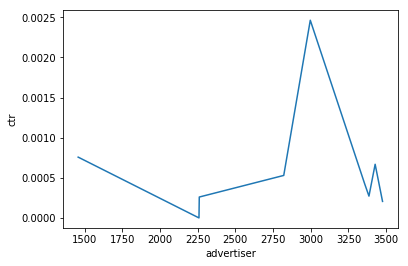

In [29]:
all_impressions_adv_analysis = [int(x) for x in all_impressions_adv_analysis]
df_const_bidding_adv_analysis['impressions'] = all_impressions_adv_analysis
df_const_bidding_adv_analysis['ctr'] = (df_const_bidding_adv_analysis['clicks']/df_const_bidding_adv_analysis['impressions']).astype(float)
ax = sns.lineplot(x="advertiser",y='ctr',data=df_const_bidding_adv_analysis)

# Random Bidding

In [0]:
# values to store
all_impressions_rand = []
all_clicks_rand = []
all_costs_rand = []

# value to find
lower_bound_rand = []
upper_bound_rand = []

In [0]:
# max range for the upper and lower bounds
window_size = 50
window_step = 2 
# finding an average for random bidding within the window
repeat_random_bidding = 1
# can be set to 1 to achieve more inaccurate, but realistic approach
# used to provide better accuracy of the bounds

# new range for the random bidding
range_step_rand = 10
range_bids_rand = np.arange(min_bid, max_bid - window_size, range_step_rand) # use "-window_size" to not exceed the range later in looping

In [0]:
# running for all possible bids
for bid in range_bids_rand:   
  for j in range(window_step, window_size, window_step): # not starting from 0 to avoid lower == upper bound
    temp_range = np.arange(bid, bid + j, 1) # used to generate random bid within the current range
    
    # saving the current bounds
    lower_bound_rand.append(bid)
    upper_bound_rand.append(bid + j)

    clicks_saved = 0
    impressions_saved = 0.0
    payprices_saved = 0.0

    # running n times for average results, thus getting better estimates of the bounds
    for i in range(repeat_random_bidding):
      random_bid = random.choice(temp_range)

      temp_budget = initial_budget
      clicks = 0
      impressions = 0.0
      payprices = 0.0

      # looping through validation set
      for payprice, click in df_val[['payprice','click']].values:
        if random_bid >= payprice and temp_budget > payprice:
          temp_budget = temp_budget - payprice
          clicks = clicks + click
          impressions = impressions + 1
          payprices = payprices + payprice

      clicks_saved = clicks_saved + clicks
      impressions_saved = impressions_saved + impressions
      payprices_saved = payprices_saved + payprices

    # saving AVERAGED results of the loop
    all_clicks_rand.append(clicks_saved / repeat_random_bidding)
    all_impressions_rand.append(impressions_saved / repeat_random_bidding)
    all_costs_rand.append(payprices_saved / repeat_random_bidding)

In [45]:
df_rand_bidding = pd.DataFrame()
df_rand_bidding['lower bound'] = lower_bound_rand
df_rand_bidding['upper bound'] = upper_bound_rand

all_impressions_rand = [int(x) for x in all_impressions_rand]
df_rand_bidding['impressions'] = all_impressions_rand

df_rand_bidding['clicks'] = all_clicks_rand
df_rand_bidding['ctr'] = (df_rand_bidding['clicks']/df_rand_bidding['impressions']).astype(str)

all_costs_rand = [x / 1000 for x in all_costs_rand]
df_rand_bidding['cost'] = all_costs_rand
df_rand_bidding['cpm'] = (df_rand_bidding['cost']/df_rand_bidding['impressions'] * 1000).astype(str)
df_rand_bidding['cpc'] = (df_rand_bidding['cost']/df_rand_bidding['clicks']).astype(str) 

df_rand_bidding.head(10)

,lower bound,upper bound,impressions,clicks,ctr,cost,cpm,cpc
0,0,2,373,0.0,0.0,0.000291,0.0007801608579088472,inf
1,0,4,373,0.0,0.0,0.000291,0.0007801608579088472,inf
2,0,6,373,0.0,0.0,0.000291,0.0007801608579088472,inf
3,0,8,11103,4.0,0.00036026299198414844,0.055839,0.005029181302350716,0.01395975
4,0,10,11103,4.0,0.00036026299198414844,0.055839,0.005029181302350716,0.01395975
5,0,12,851,0.0,0.0,0.001247,0.0014653349001175087,inf
6,0,14,82,0.0,0.0,0.000000,0.0,nan
7,0,16,23489,5.0,0.00021286559666226743,0.192564,0.008198050151134572,0.0385128
8,0,18,29633,9.0,0.00030371545236729323,0.291694,0.009843552795869471,0.03241044444444444
9,0,20,82,0.0,0.0,0.000000,0.0,nan


In [34]:
df_rand_bidding.describe()

,lower_bound,upper_bound,impressions,clicks,cost
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,120.000000,145.000000,100583.186667,50.715000,5231.154205
std,72.171193,73.489236,29693.574232,15.963662,1967.233076
min,0.000000,2.000000,82.000000,0.000000,0.000000
25%,60.000000,82.000000,85534.750000,53.000000,6249.999000
50%,120.000000,145.000000,98988.500000,57.000000,6249.999000
75%,180.000000,208.000000,120257.000000,59.000000,6249.999000
max,240.000000,288.000000,162213.000000,68.000000,6249.999000


In [46]:
best_bound_clicks = df_rand_bidding[df_rand_bidding['clicks'] == max(df_rand_bidding['clicks'])]
best_bound_clicks.head(5)

,lower bound,upper bound,impressions,clicks,ctr,cost,cpm,cpc
186,70,108,145941,68.0,0.000465941716172974,6.249999,0.04282551853146135,0.09191175
188,70,112,145941,68.0,0.000465941716172974,6.249999,0.04282551853146135,0.09191175


In [47]:
best_bound_clicks.describe()

,lower bound,upper bound,impressions,clicks,cost
count,2.0,2.000000,2.0,2.0,2.000000
mean,70.0,110.000000,145941.0,68.0,6.249999
std,0.0,2.828427,0.0,0.0,0.000000
min,70.0,108.000000,145941.0,68.0,6.249999
25%,70.0,109.000000,145941.0,68.0,6.249999
50%,70.0,110.000000,145941.0,68.0,6.249999
75%,70.0,111.000000,145941.0,68.0,6.249999
max,70.0,112.000000,145941.0,68.0,6.249999


In [37]:
best_bound_ctr = df_rand_bidding[df_rand_bidding['ctr'] == max(df_rand_bidding['ctr'])]
best_bound_ctr.head(5)

,lower_bound,upper_bound,impressions,clicks,ctr,cost,cpm,cpc
585,240,260,82689,54.0,0.0006530493777890651,6249.999,75.58440663207922,115.74072222222222


# Random Bidding with Multiple Agents

In Random Bidding section we have identified the optimal lower and upper bounds for maximum number of Clicks (~66.8) to be between 80 and 82, which is close to the optimal constant bidding value (79), considering the range is small.


On the other hand, the maximum CTR (~0.0647) is achived through 240 and 270 lower and upper bounds. We assume the model achieving such range the first will be the model to win against the others.

Other agents are only affecting our bid by bidding a better price than us. Additionally, if they bid a price higher than payprice, then we record their bid price as our cost.

In [38]:
# max range for the upper and lower bounds
window_size_multi = 50
window_step_multi = 5
# for this model, as we are not trying to identify the most accurate bounds, 
# but mostly to compete against the other agents, thus we are not taking an average of the random bids

# new range for the random bidding
range_step_multi = 10
range_bids_multi = np.arange(min_bid, max_bid - window_size_multi, range_step_multi) # use "-window_size" to not exceed the range later in looping
print(range_bids_multi)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240]


In [0]:
# number of agents
num_agents = 100

class Agent:  
  # initialise
  def __init__(self, unique_id, budget):
    self.unique_id = unique_id
    
    self.budget = budget
    self.all_impressions = []
    self.all_clicks = []
    self.all_costs = []

    # although these values will be the same for each agent during bidding (homogeneous)
    # store it for later analyses and reference
    self.lower_bound = []
    self.upper_bound = []

    # saving results of the loop
    self.all_clicks = []
    self.all_impressions = []
    self.all_costs = []

    # temporary values per iteration
    self.clicks = 0
    self.impressions = 0.0
    self.payprices = 0.0
    
  # main parameters
  def set_random_bid(self, random_bid):
    self.random_bid = random_bid
  
  def get_random_bid(self):
    return self.random_bid
  
  # budget and bounds
  def set_iterative_values(self, budget, lower_bound, upper_bound):
    self.budget = budget
    self.lower_bound.append(lower_bound)
    self.upper_bound.append(upper_bound)
    
  def get_budget(self):
    return self.budget
  
  def sub_budget(self, cost):
    self.budget = self.budget - cost
    
  def get_upper_bound(self):
    return self.upper_bound
    
  def get_lower_bound(self):
    return self.lower_bound
  
  # list data
  def add_data(self, impressions, clicks, costs):
    self.all_impressions.append(impressions)
    self.all_clicks.append(clicks)
    self.all_costs.append(costs)
    
  def get_all_impressions(self):
#     print("all impressions:", all_impressions)
    return self.all_impressions
  
  def get_all_clicks(self):
    return self.all_clicks
  
  def get_all_costs(self):
    return self.all_costs
  
  # temporary parameters used for calculation
  def set_temporary_values(self, clicks, impressions, payprices):
    self.clicks = clicks
    self.impressions = impressions
    self.payprices = payprices
  
  def get_clicks(self):
    return self.clicks
  
  def get_impressions(self):
    return self.impressions
  
  def get_payprices(self):
    return self.payprices
  
  # for testing
  def print_id(self):
    print(self.unique_id)
    
  def get_id(self):
    return self.unique_id
    
  def print_bid(self):
    print(self.random_bid)
    
# agent = Agent(5)
# agent.print_budget()
# agent.print_id()

In [0]:
agents = []

# initiating all agents
for i in range(num_agents):
  agent = Agent(i, initial_budget)
  agents.append(agent)
#   agent.print_id() 

# running for all possible bids
for bid in range_bids_multi:  
  for j in range(window_step_multi, window_size_multi, window_step_multi):
    # generate random bid for each agent
    for agent in agents:
      # resetting values
      agent.set_iterative_values(initial_budget, bid, bid + j)
      agent.set_temporary_values(0, 0, 0)
     
      # save each bid per agent
      temp_rand_bid = random.choice(np.arange(bid, bid + j, 1))
      agent.set_random_bid(temp_rand_bid)
    
    # sort all agents by their bid value
    agents.sort(key = attrgetter('random_bid'), reverse=True)
    # looping through validation set
    for payprice, click in df_val[['payprice','click']].values:
      i = 0
      bid_paid = False
      while(bid_paid == False and i < num_agents):
        if agents[i].get_random_bid() >= payprice and agents[i].get_budget() >= payprice:
          clicks = agents[i].get_clicks() + click
          impressions = agents[i].get_impressions() + 1
          
          second_exists = False
          if i+1 < num_agents:
            second_exists = True
            
            if agents[i+1].get_random_bid() > payprice:
              agents[i].sub_budget(agents[i+1].get_random_bid())
#               print("A:", agents[i].get_id(), "B:", agents[i].get_budget())
              payprices = agents[i].get_payprices() + agents[i+1].get_random_bid()  
            else:
              second_exists = False
          else:
            second_exists = False

          
          if second_exists == False:
            agents[i].sub_budget(payprice)
            payprices = agents[i].get_payprices() + payprice

          agents[i].set_temporary_values(clicks, impressions, payprices)
          
          bid_paid = True # exit the loop of bidders because the main bidder paid it

        elif agents[i].get_random_bid() < payprice:
          bid_paid = True # exit because other bids are smaller so no one can pay for it
        elif agents[i].get_budget() < payprice:
          bid_paid = False # do nothing, next bidder takes place for bidding
          i = i + 1
#           random_bidding(agents, payprice, click)
    
    # saving data per bound 
    for agent in agents:
      all_impressions = agent.get_impressions()
      all_clicks = agent.get_clicks()
      all_costs = agent.get_payprices()
#       print("I:", all_impressions, "C:", all_clicks, "P:", all_costs)
      agent.add_data(all_impressions, all_clicks, all_costs)
                 
# for agent in agents:
#   agent.print_id()

In [44]:
# calculating results
def print_bid(i):
  df_multi_bidding = pd.DataFrame()

  df_multi_bidding['lower bound'] = agents[i].get_lower_bound()
  df_multi_bidding['upper bound'] = agents[i].get_upper_bound() 

  all_impressions_multi = agents[i].get_all_impressions()
  all_clicks_multi = agents[i].get_all_clicks()
  all_costs_multi = agents[i].get_all_costs()

  # adding new entries
  all_impressions_multi = [int(x) for x in all_impressions_multi]
  df_multi_bidding['impressions'] = all_impressions_multi

  df_multi_bidding['clicks'] = all_clicks_multi
  df_multi_bidding['ctr'] = (df_multi_bidding['clicks']/df_multi_bidding['impressions']).astype(str)

  all_costs_multi = [x / 1000 for x in all_costs_multi]
  df_multi_bidding['cost'] = all_costs_multi
  df_multi_bidding['cpm'] = (df_multi_bidding['cost']/df_multi_bidding['impressions'] * 1000).astype(str)
  df_multi_bidding['cpc'] = (df_multi_bidding['cost']/df_multi_bidding['clicks']).astype(str) 

  return df_multi_bidding


best_ctr_per_agent = []
best_ctr_per_agent_lb = []
best_ctr_per_agent_ub = []
best_ctr_per_agent_im = []
best_ctr_per_agent_cl = []
best_ctr_per_agent_co = []
best_ctr_per_agent_cp = []
best_ctr_per_agent_cc = []

for i in range(num_agents):
  multi_value = print_bid(i)
  multi_value['ctr'] = multi_value['ctr'].replace("nan","0")
  temp = multi_value[multi_value['ctr'] == max(multi_value['ctr'])]
#   best_ctr_per_agent.append(max(multi_value['ctr']))
  if temp['ctr'].values[0] == '0':
    best_ctr_per_agent.append("0")
    best_ctr_per_agent_lb.append("0")
    best_ctr_per_agent_ub.append("0")
    best_ctr_per_agent_im.append("0")
    best_ctr_per_agent_cl.append("0")
    best_ctr_per_agent_co.append("0")
    best_ctr_per_agent_cp.append("0")
    best_ctr_per_agent_cc.append("0")
  else:
    best_ctr_per_agent.append(temp['ctr'].values)
    best_ctr_per_agent_lb.append(temp['lower bound'].values)
    best_ctr_per_agent_ub.append(temp['upper bound'].values)
    best_ctr_per_agent_im.append(temp['impressions'].values)
    best_ctr_per_agent_cl.append(temp['clicks'].values)
    best_ctr_per_agent_co.append(temp['cost'].values)
    best_ctr_per_agent_cp.append(temp['cpm'].values)
    best_ctr_per_agent_cc.append(temp['cpc'].values)
  
stats_per_agent = pd.DataFrame()

stats_per_agent['clicks'] = best_ctr_per_agent_cl
stats_per_agent['ctr'] = best_ctr_per_agent
stats_per_agent['lower bound'] = best_ctr_per_agent_lb
stats_per_agent['upper bound'] = best_ctr_per_agent_ub
stats_per_agent['impressions'] = best_ctr_per_agent_im
stats_per_agent['cost'] = best_ctr_per_agent_co
stats_per_agent['cpm'] = best_ctr_per_agent_cp
stats_per_agent['cpc'] = best_ctr_per_agent_cc

stats_per_agent = stats_per_agent.sort_values(by=['ctr'], ascending = False)
stats_per_agent.head(5)

,ctr,lower bound,upper bound,impressions,clicks,cost,cpm,cpc
13,[0.0018331805682859762],[240],[275],[1091],[2],[293.479],[268.99999999999994],[146.7395]
23,[0.0014705882352941176],[180],[200],[680],[1],[133.96],[197.0],[133.96]
62,[0.0014610728449175538],[80],[90],[9582],[14],[852.798],[89.0],[60.914142857142856]
36,[0.001321722904680454],[90],[135],[12862],[17],[1672.06],[130.0],[98.3564705882353]
47,[0.0012672486623486342],[160],[190],[14204],[18],[2641.944],[186.0],[146.77466666666666]


In [48]:
stats_per_agent.tail(5)

,ctr,lower bound,upper bound,impressions,clicks,cost,cpm,cpc
12,[0.0007065577390152352],[240],[285],[22645],[16],[6250.023],[276.00013247957605],[390.6264375]
30,[0.0007055779859668379],[210],[250],[25511],[18],[6250.204],[245.00035278899296],[347.23355555555554]
76,[0.0006820617753093638],[190],[205],[30789],[21],[6250.182],[203.00048718698235],[297.62771428571426]
78,[0.0006444610270673631],[170],[215],[29482],[19],[6250.184],[212.0],[328.95705263157896]
74,[0.0006364657431673531],[230],[235],[26710],[17],[6250.14],[234.0],[367.6552941176471]


In [50]:
stats_per_agent = stats_per_agent.sort_values(by=['clicks'], ascending = False)
stats_per_agent.head(5)

,ctr,lower bound,upper bound,impressions,clicks,cost,cpm,cpc
61,[0.0007787151200519143],[90],[100],[38525],[30],[3813.975],[98.99999999999999],[127.1325]
5,[0.0008959931187728479],[210],[225],[27902],[25],[6250.048],[224.0],[250.00191999999998]
17,[0.0008959931187728479],[220],[225],[27902],[25],[6250.048],[224.0],[250.00191999999998]
35,[0.0007359868111163448],[150],[185],[33968],[25],[6250.112],[184.0],[250.00448]
82,[0.0008371119637251483],[180],[220],[28670],[24],[6250.076],[218.0005580746425],[260.4198333333333]


In [51]:
stats_per_agent.tail(5)

,ctr,lower bound,upper bound,impressions,clicks,cost,cpm,cpc
42,[0.0009454029780193808],[180],[220],[4231],[4],[909.665],[215.0],[227.41625]
20,[0.0011650485436893205],[230],[235],[2575],[3],[602.55],[234.0],[200.85]
6,[0.0011730205278592375],[210],[235],[1705],[2],[395.56],[232.0],[197.78]
13,[0.0018331805682859762],[240],[275],[1091],[2],[293.479],[268.99999999999994],[146.7395]
23,[0.0014705882352941176],[180],[200],[680],[1],[133.96],[197.0],[133.96]


In [43]:
def most_common(lst):
    return max(set(lst), key=lst.count)
  
best_ctr_per_agent_lb_mf = [int(x) for x in best_ctr_per_agent_lb]
best_ctr_per_agent_lb_mf = list(filter((0).__ne__, best_ctr_per_agent_lb_mf)) # in case there are too manu 0s
print("Most frequent lower bound is", most_common(best_ctr_per_agent_lb_mf))

best_ctr_per_agent_ub_mf = [int(x) for x in best_ctr_per_agent_ub]
best_ctr_per_agent_ub_mf = list(filter((0).__ne__, best_ctr_per_agent_ub_mf)) # in case there are too manu 0s
print("Most frequent upper bound is", most_common(best_ctr_per_agent_ub_mf))

Most frequent lower bound is 230
Most frequent upper bound is 225
